## Co-variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<b>wikiHow</b> provides a very easy to understand example of how to calculate co-variance<br>
https://www.wikihow.com/Calculate-Covariance <br>
Using their sample data, below we see how to view the data, and then find the covariance using np.cov():

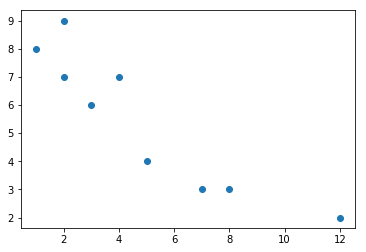

In [2]:
x = [1, 3, 2, 5, 8, 7, 12, 2, 4]
y = [8, 6, 9, 4, 3, 3, 2, 7, 7]
plt.scatter(x, y)

Note that as per https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/ np.cov() returns the correlation matrix, but the key value we are looking for is the <b>[0,1]</b> element, i.e. -8.07

In [3]:
np.cov(x, y)

array([[ 12.61111111,  -8.06944444],
       [ -8.06944444,   6.27777778]])

Let's do another example which is fairly typical: the relationship between <b>heights and weights</b>:

In [14]:
# First let's get a normally distributed sample of people heights
heights = np.random.normal(1.65, 0.10, 100)

In [15]:
# And a normally distributed sample of people weights
weights = np.random.normal(60, 8, 100)

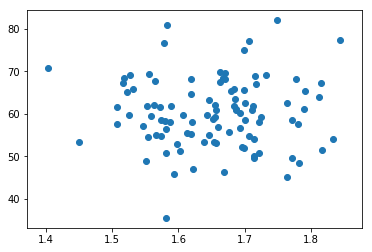

In [16]:
# Because we have not setup any kind of relationship between the 2 we can quickly see there is no real 
# relationship between heights and weights if we visualize the data:
plt.scatter(heights, weights)

In [17]:
# But we can change that by sorting the data:
heights.sort()
weights.sort()

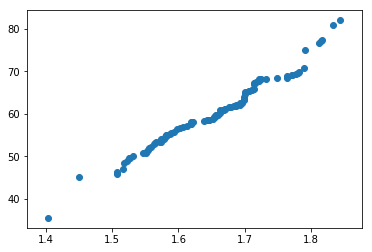

In [18]:
# Having forced a relationship we can clearly see this in the data
plt.scatter(heights, weights)

In [20]:
# Now let's find the co-variance...
np.cov(heights, weights)

array([[  7.87464896e-03,   7.10461347e-01],
       [  7.10461347e-01,   6.58789965e+01]])

In [21]:
# We can also find this answer the long way based on the formula:
# ∑(xi - xavg)(yi - yavg) / n - 1

mean_height = np.mean(heights)
mean_weight = np.mean(weights)
heights_array = np.array([hi - mean_height for hi in heights])
weights_array = np.array([wi - mean_weight for wi in weights])
numerator = heights_array @ weights_array
denominator = len(heights) - 1
covariance = numerator / denominator
print(covariance)

0.710461347301


Interpreting the result:<br>
- <b>Is it positive or negative?</b> If it's positive then as one variable increases so does the other (e.g. heights and weights). If it's negative then as one variable increases the other decreases (e.g. practice hours and math test scores)<br>
- <b>How big is the number in relation to the data?</b> If it's quite a big number then the relationship is quite a strong one. If it's quite a small number in relation to the data, say 0.00something then the relationship is probably negligible.<br>
- By looking at the spread of the data above we can <b>check this understanding</b>...<p>
But of course the difficulty here is "what is a big number?" since we have 2 different units of measure (meters and kilograms)!<br>

## Correlation
Correlation will normalize the different units of measure to give a standardized value between -1 (perfect negative correlation) and 1 (perfect positive correlation) with 0 representing absolutely no correlation whatsoever.

In [22]:
# Finding the correlation co-efficient is easy enough with numpy!
np.corrcoef(heights, weights)

array([[ 1.        ,  0.98639614],
       [ 0.98639614,  1.        ]])

In [23]:
# We can also find this answer the long way by building on the values found for co-variance above. The formula is...
# ∑(xi - xavg).(yi - yavg) / sqrt(x.x * y.y)
heights_sq = heights_array @ heights_array
weights_sq = weights_array @ weights_array
correlation = numerator / np.sqrt(heights_sq * weights_sq)
print(correlation)

0.986396144201


So we DO indeed have a very high positive correlation, as could be seen in the plot!

## Linear regression

So now that we have established that there is a high correlation between heights and weights, we would like to find the line that best fits this relationship. Why? because then given the height of any other random future person we could predict their probable weight, and vice-versa.

Mathsisfun provides a very easy to understand lesson on how least squares regression is calculated:
https://www.mathsisfun.com/data/least-squares-regression.html. Essentially, given that the equation of a line is expressed as y = mx + b, we are trying to solve for the constants m and b so that we get the line that represents the best fit for our data (the one that minimizes the squared differences from the data points to the line in each case).

In [36]:
# We'll need the stats module from scipy
from scipy import stats

# Using the linregress() function returns 5 values, which we name here for convenience:
slope, intercept, r_value, p_value, std_err = stats.linregress(heights, weights)

# Slope = m from our equation, Intercept = b, r_value = our correlation co-efficient
print(slope, intercept, r_value)

90.2213356483 -88.82225037 0.986396144201


In [37]:
# By squaring r_value we get the co-efficient of determination
r_value ** 2

0.9729773532953242

A quick note here - what is the difference between the co-efficient of correlation, and the co-efficient of determination?<br>
It is very nicely explained here: http://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-is-the-difference-between-coefficient-of-determination-and-coefficient-of-correlation/ but essentially:<br>
- The co-efficient of correlation is a number between -1 (perfect negative correlation) and 1 (perfect positive correlation) which is indicative of how the 2 sets of values are correlated<br>
- The co-efficient of determination is a number between 0 and 1 (of course because it has been squared!) and is indicative of how good a fit the line is to the original data - the higher the better

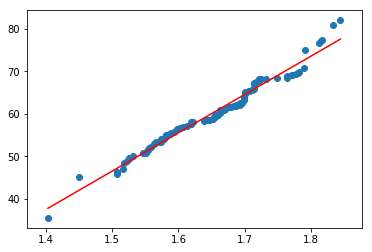

In [34]:
# Here we create a little function which takes heights as inputs in order to predict corresponding weights values:
def get_weights(heights):
    return slope * heights + intercept

plt.scatter(heights, weights)
plt.plot(heights, get_weights(heights), c='r')
plt.show()